In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings

In [5]:
df_lung_cancer = pd.read_csv("E:\Study\OSD\Assignments\Four\lung_cancer.csv")
df_lung_cancer.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [6]:
df_lung_cancer['LUNG_CANCER'] = df_lung_cancer['LUNG_CANCER'].replace({'NO': 0, 'YES': 1})

In [7]:
df_lung_cancer.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming df_diabetes is your DataFrame and 'Diabetes' is your target column
X = df_lung_cancer.drop('LUNG_CANCER', axis=1)
y = df_lung_cancer['LUNG_CANCER']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =55)
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

  3%|▎         | 1/29 [00:00<00:07,  3.91it/s]

100%|██████████| 29/29 [00:01<00:00, 15.64it/s]

[LightGBM] [Info] Number of positive: 215, number of negative: 32
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 70
[LightGBM] [Info] Number of data points in the train set: 247, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.870445 -> initscore=1.904902
[LightGBM] [Info] Start training from score 1.904902
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.87,0.86,0.86,0.89,0.02
SVC,0.95,0.85,0.85,0.95,0.02
LinearSVC,0.94,0.84,0.84,0.94,0.02
RandomForestClassifier,0.92,0.83,0.83,0.92,0.17
ExtraTreesClassifier,0.92,0.83,0.83,0.92,0.15
ExtraTreeClassifier,0.90,0.82,0.82,0.91,0.00
LabelPropagation,0.89,0.81,0.81,0.90,0.01
LabelSpreading,0.89,0.81,0.81,0.90,0.02
SGDClassifier,0.94,0.78,0.78,0.93,0.01


Using K-NN Model 

In [9]:
def tune_knn_parameters(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Test different values of k
    k_values = range(1, 21)
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X_train, y_train, cv=5)
        print(f'k={k}, Mean Accuracy: {scores.mean()}')

In [10]:
def lazy_classification(X_train, y_train, X_test, y_test, k_value):
    # Train k-NN with the selected k
    knn = KNeighborsClassifier(n_neighbors=k_value)
    knn.fit(X_train, y_train)

    # Predictions on the test set
    y_pred = knn.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Classification Report
    cr = classification_report(y_test, y_pred)
    print("\nClassification Report:")
    print(cr)

    # Evaluate the model on the test set
    accuracy = knn.score(X_test, y_test)
    print(f'Test Set Accuracy: {accuracy}')

In [11]:
tune_knn_parameters(X, y)

k=1, Mean Accuracy: 0.8625306122448979
k=2, Mean Accuracy: 0.8181224489795917
k=3, Mean Accuracy: 0.8462857142857143
k=4, Mean Accuracy: 0.8544489795918366
k=5, Mean Accuracy: 0.8624489795918366
k=6, Mean Accuracy: 0.8583673469387755
k=7, Mean Accuracy: 0.8542857142857143
k=8, Mean Accuracy: 0.858204081632653
k=9, Mean Accuracy: 0.850204081632653
k=10, Mean Accuracy: 0.8542857142857143
k=11, Mean Accuracy: 0.8421224489795918
k=12, Mean Accuracy: 0.8421224489795918
k=13, Mean Accuracy: 0.846204081632653
k=14, Mean Accuracy: 0.8421224489795918
k=15, Mean Accuracy: 0.846204081632653
k=16, Mean Accuracy: 0.8421224489795918
k=17, Mean Accuracy: 0.8502857142857142
k=18, Mean Accuracy: 0.846204081632653
k=19, Mean Accuracy: 0.8502857142857142
k=20, Mean Accuracy: 0.8502857142857142


In [12]:
lazy_classification(X_train, y_train, X_test, y_test, 19)

Confusion Matrix:
[[ 0  7]
 [ 0 55]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.89      1.00      0.94        55

    accuracy                           0.89        62
   macro avg       0.44      0.50      0.47        62
weighted avg       0.79      0.89      0.83        62

Test Set Accuracy: 0.8870967741935484


plotting Learning Curve For K-NN Model

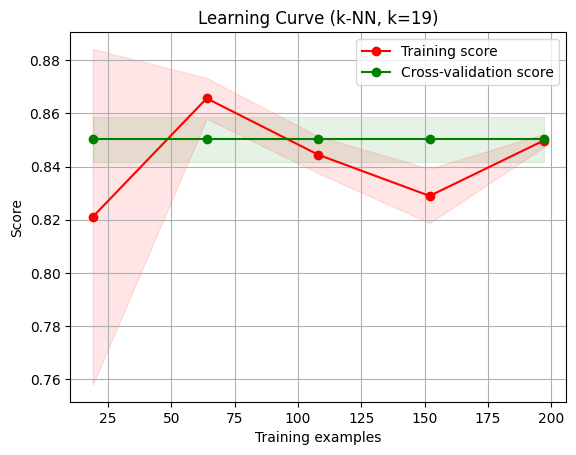

In [13]:
import numpy as np

def plot_learning_curve(estimator, title, X, y, cv=5, n_jobs= -1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters:
    - estimator: The object to use to fit the data.
    - title: Title for the chart.
    - X: Training vector, where n_samples is the number of samples and n_features is the number of features.
    - y: Target relative to X for classification or regression.
    - cv: Cross-validation generator or an iterable, default=None.
    - n_jobs: Number of jobs to run in parallel, default=None.
    - train_sizes: Relative or absolute numbers of training examples that will be used to generate the learning curve.

    Returns:
    - plt: Matplotlib plot object.
    """
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, return_times=True)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1,
                     color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Assuming X_train, y_train, X_test, y_test are your training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a k value for k-NN
k_value = 19
knn = KNeighborsClassifier(n_neighbors=k_value)

# Plot learning curve
plot_learning_curve(knn, f"Learning Curve (k-NN, k={k_value})", X_train, y_train, cv=5, n_jobs=-1)
plt.show()


Plotting ROC Curve For K-NN Model

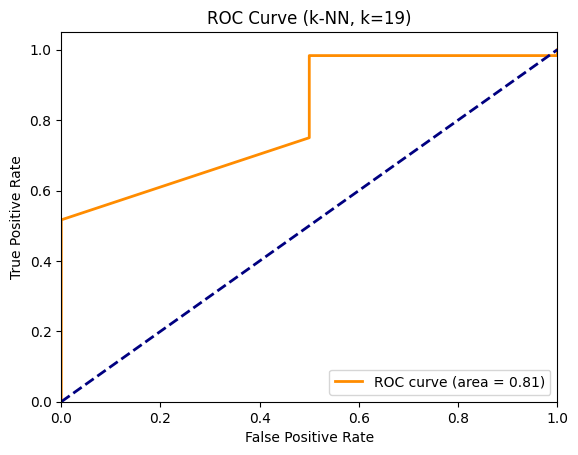

In [14]:
# Function for tuning k-NN parameters
def tune_knn_parameters(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Test different values of k
    k_values = 19
    
    knn = KNeighborsClassifier(n_neighbors=k_values)
    knn.fit(X_train, y_train)

        # Plot ROC curve
    plot_roc_curve(knn, X_test, y_test, f"ROC Curve (k-NN, k={k_values})")

# Function to plot ROC curve
def plot_roc_curve(model, X_test, y_test, title):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Assuming X, y are your dataset
tune_knn_parameters(X, y)

Using Decision Tree Classifier Model

In [15]:
from sklearn.tree import DecisionTreeClassifier
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier
# Tuning the max depth parameter
best_depth = None
best_accuracy_tree = 0

for depth_value in [None, 5, 10, 15]:  # Add more values for tuning
    # Train Decision Tree Classifier with the current max depth
    dtc = DecisionTreeClassifier(max_depth=depth_value, random_state=42)
    scores = cross_val_score(dtc, X_train, y_train, cv=5, scoring='accuracy')

    # Compute mean accuracy
    mean_accuracy_tree = scores.mean()

    print(f"Max Depth={depth_value}, Mean Accuracy: {mean_accuracy_tree}")

    # Update best parameters if needed
    if mean_accuracy_tree > best_accuracy_tree:
        best_accuracy_tree = mean_accuracy_tree
        best_depth = depth_value

# Choose the optimal max depth based on the tuning results
optimal_depth = best_depth

# Perform classification with the optimal max depth
dtc = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
dtc.fit(X_train, y_train)

# Predictions on the test set
y_pred_tree = dtc.predict(X_test)

# Decision Tree Classifier - Confusion Matrix
cm_tree = confusion_matrix(y_test, y_pred_tree)
print("\nDecision Tree Classifier - Confusion Matrix:")
print(cm_tree)

# Decision Tree Classifier - Classification Report
cr_tree = classification_report(y_test, y_pred_tree)
print("\nDecision Tree Classifier - Classification Report:")
print(cr_tree)

# Decision Tree Classifier - Evaluate the model on the test set
accuracy_tree = dtc.score(X_test, y_test)
print(f'Decision Tree Classifier - Test Set Accuracy: {accuracy_tree}')

Max Depth=None, Mean Accuracy: 0.8542857142857143
Max Depth=5, Mean Accuracy: 0.8622857142857143
Max Depth=10, Mean Accuracy: 0.8542857142857143
Max Depth=15, Mean Accuracy: 0.8542857142857143

Decision Tree Classifier - Confusion Matrix:
[[ 1  1]
 [ 3 57]]

Decision Tree Classifier - Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.50      0.33         2
           1       0.98      0.95      0.97        60

    accuracy                           0.94        62
   macro avg       0.62      0.72      0.65        62
weighted avg       0.96      0.94      0.95        62

Decision Tree Classifier - Test Set Accuracy: 0.9354838709677419


Plotting Learning Curve for Decision Tree Calssifier Model

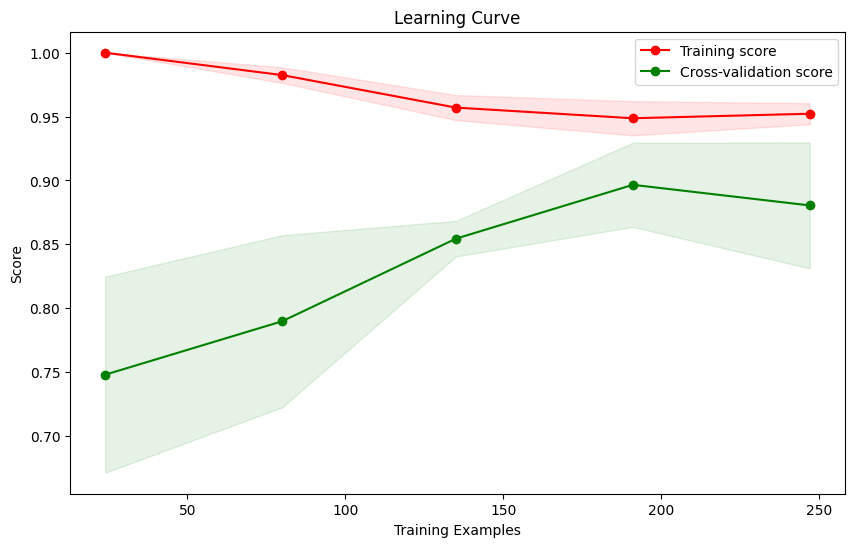

In [16]:
# Assuming `model` is your trained model and `X`, `y` are your features and labels
train_sizes, train_scores, test_scores = learning_curve(dtc, X, y, cv=5)

# Calculate mean and standard deviation across cross-validation folds
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()


Plotting ROC for Decision Tree Classifier Model

Text(0, 0.5, 'True Positive Rate')

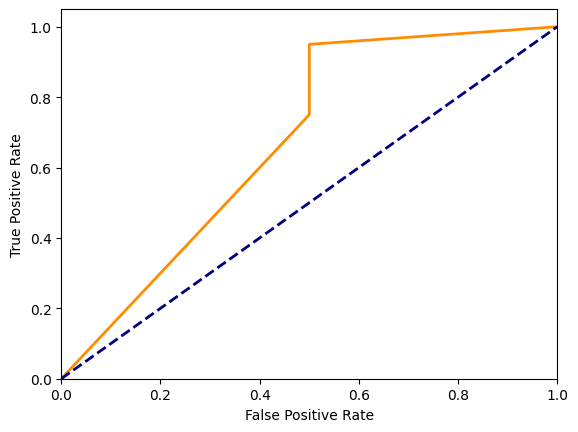

In [17]:
# Plot ROC curve
y_prob = dtc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')